# ML_01 Linear Regression (one variable) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

I will do a linear model on a housing in King County data set. I will do it using 2 methods :
* Algebraic one 
* Gradient Descent 

Let's firstly load and look at our data 

In [2]:
data = pd.read_csv('/home/kuba/wakacje/machine lerning/house_king_county.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


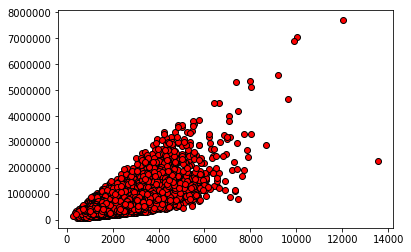

In [3]:
# we will predict by sqft_living
x = data['sqft_living']
y = data['price']

plt.plot(x,y, 'ro', mec = 'black')

## Algebraic

In [5]:
# this method is efficient for not so large data sets, because of the large matrix multiplication and inversion, so 
# we will chunk some of our data
x1 = np.array(x)[:5000] 
y1 = np.array(y) [:5000]

h0(x) = theta[0] * x0 + theta[1] * x1                                    
in our case x0 should be equal to 1 
so:

In [12]:
X_1 = np.stack([np.ones(x1.size),x1],axis = 1)
X_1

array([[1.00e+00, 1.18e+03],
       [1.00e+00, 2.57e+03],
       [1.00e+00, 7.70e+02],
       ...,
       [1.00e+00, 1.58e+03],
       [1.00e+00, 1.23e+03],
       [1.00e+00, 2.20e+03]])

In [15]:
A = X_1.transpose() @ X_1 
B = np.linalg.inv(A)

theta = B @ X_1.transpose() @ y1
theta

array([-64794.3009012 ,    293.13513155])

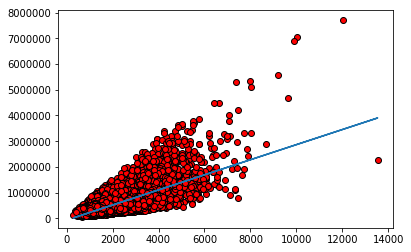

In [16]:
plt.plot(x,y, 'ro', mec = 'black')
plt.plot(x,theta[0] + theta[1]*x)

## Gradient Descent

lets create some functions

In [17]:
def normalize(x): 
    """
    normalizing vector
    """
    
    return (x-x.mean())/x.std()


In [24]:
def gradientDescent_1_variable(X,y,theta,alpha,iternum):
    """
    X - m x 2 matrix, first column are ones 
    y - vector we want to learn with 
    theta - constants 
    alpha - learning rate 
    iternum - number of desired iterations
    """
    m = X.size
    
    for i in range(iternum):
        df_x0 = (X@theta - y)@X[:,0]/m
        df_x1 = (X@theta - y)@X[:,1]/m

        theta[0] = theta[0] - alpha * df_x0
        theta[1] = theta[1] - alpha * df_x1 
    
    return theta
    

In [20]:
x_norm = normalize(x) 
y_norm = normalize(y) 

In [21]:
X_1 = np.stack([np.ones(x_norm.size),x_norm],axis = 1)

In [30]:
# theta will be changing, at fisrs (0,0)
theta = np.zeros(2)

# lerning rate 
alpha = 0.1

iternum = 5000

b, a = gradientDescent_1_variable(X_1, y_norm, theta, alpha,iternum)

b,a

(-1.9397080270331201e-16, 0.7020350546117993)

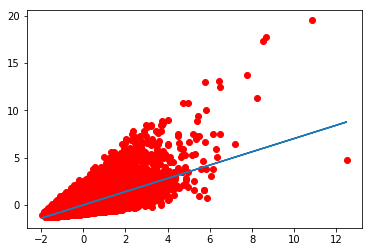

In [33]:
plt.plot(x_norm,y_norm, 'ro')
plt.plot(x_norm, a*x_norm +b)

As we can see it is similar to our algebraic solution an is fully scalable :)